In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from google.colab.patches import cv2_imshow
path='/content/drive/MyDrive/Uni/tmu/vision/hapoo.jpg'

step1

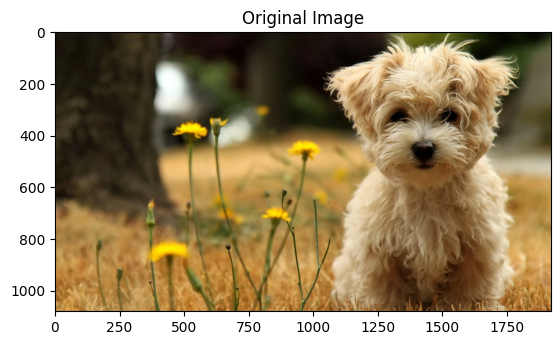

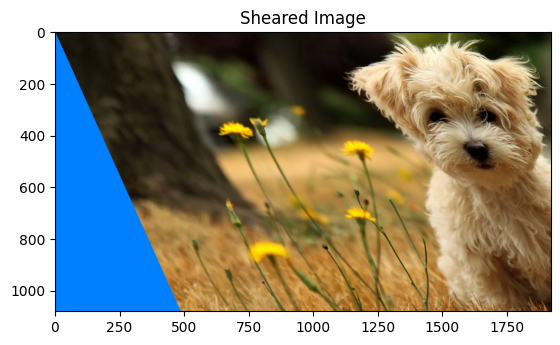

In [4]:
a = 0.45 #the shearing factor
A=cv2.imread(path)
height, width, channels = A.shape

#the affine transformation matrix
M = np.array([[1, a, 0], [0, 1, 0]], dtype=np.float32)
# Apply the affine transformation
B = cv2.warpAffine(A, M, (width, height), borderValue=(255, 127, 0))

plt.figure()
plt.imshow(cv2.cvtColor(A, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.figure()
plt.imshow(cv2.cvtColor(B, cv2.COLOR_BGR2RGB))
plt.title('Sheared Image')
plt.show()

step2

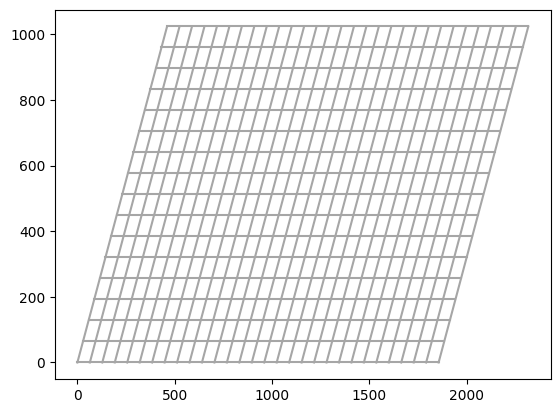

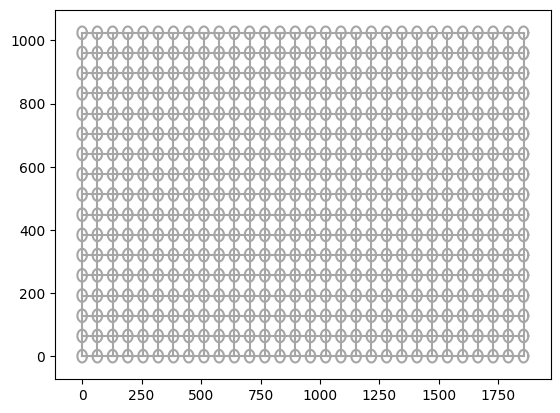

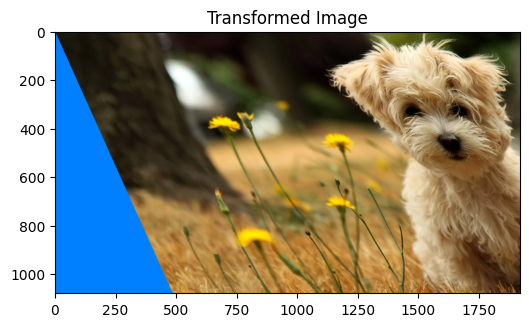

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import cv2


image = cv2.imread(path)
a = 0.45
T = np.array([[1, a, 0], [0, 1, 0]], dtype=np.float32)
height, width, _ = image.shape

sheared_image = cv2.warpAffine(image, T, (width, height), borderValue=(255, 127, 0))

U, V = np.meshgrid(np.arange(0, width, 64), np.arange(0, height, 64))

homogeneous_coords = np.column_stack((U.flatten(), V.flatten(), np.ones(U.size)))
transformed_coords = np.dot(homogeneous_coords, T.T)
X, Y = transformed_coords[:, 0].reshape(U.shape), transformed_coords[:, 1].reshape(U.shape)

gray = 0.65 * np.array([1, 1, 1])

plt.figure("h1")
plt.gca().set_prop_cycle(None)
plt.plot(U, V, color=gray)
plt.plot(U.T, V.T, color=gray)

plt.figure("h2")
plt.gca().set_prop_cycle(None)
plt.plot(X, Y, color=gray)
plt.plot(X.T, Y.T, color=gray)

plt.figure("h1")

for u in range(0, width, 64):
    for v in range(0, height, 64):
        theta = np.arange(0, 33) * (2 * np.pi / 32)
        uc = u + 20 * np.cos(theta)
        vc = v + 20 * np.sin(theta)
        homogeneous_coords = np.column_stack((uc, vc, np.ones(len(theta))))
        transformed_coords = np.dot(homogeneous_coords, T.T)
        xc, yc = transformed_coords[:, 0], transformed_coords[:, 1]
        plt.plot(uc, vc, color=gray)


plt.show()


plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(sheared_image, cv2.COLOR_BGR2RGB))
plt.title('Transformed Image')
plt.show()


step3

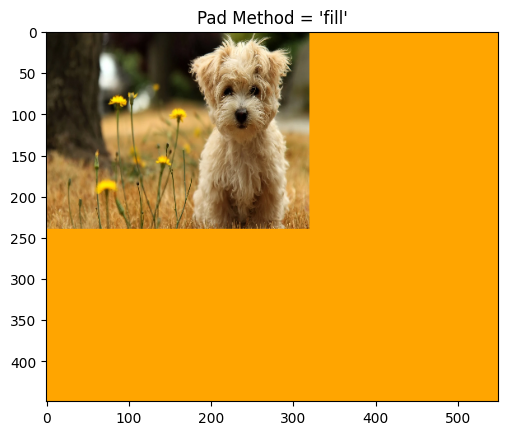

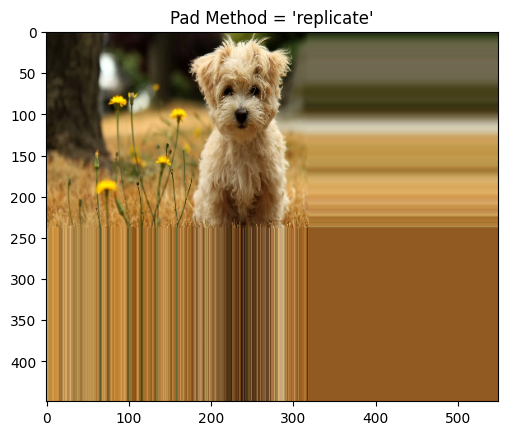

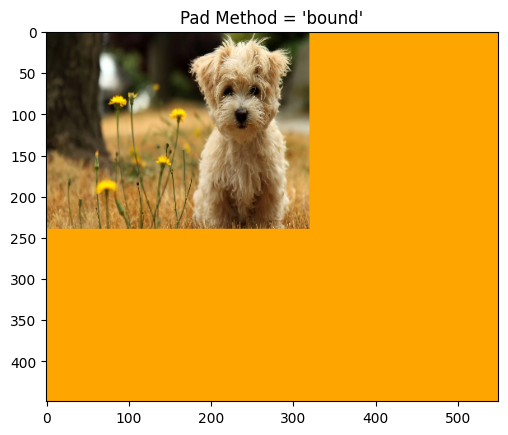

In [13]:
path='/content/drive/MyDrive/Uni/tmu/vision/hapoo.jpg'
A = cv2.imread(path)
A = cv2.resize(A, (320, 240))

T = np.array([[1, 0, 0], [0, 1, 0]], dtype=np.float32)
output_width = 549
output_height = 449
fill_value = (0, 165, 255)
Bf = cv2.warpAffine(A, T, (output_width, output_height), borderValue=fill_value)
Br = cv2.warpAffine(A, T, (output_width, output_height), borderMode=cv2.BORDER_REPLICATE)
Bb = cv2.warpAffine(A, T, (output_width, output_height), borderMode=cv2.BORDER_CONSTANT, borderValue=fill_value)
plt.figure()
plt.imshow(cv2.cvtColor(Bf, cv2.COLOR_BGR2RGB))
plt.title("Pad Method = 'fill'")

plt.figure()
plt.imshow(cv2.cvtColor(Br, cv2.COLOR_BGR2RGB))
plt.title("Pad Method = 'replicate'")

plt.figure()
plt.imshow(cv2.cvtColor(Bb, cv2.COLOR_BGR2RGB))
plt.title("Pad Method = 'bound'")
T2 = np.array([[12, 0, 0], [0, 12, 0]], dtype=np.float32)
Cf = cv2.warpAffine(A, T2, (28, 30), borderValue=fill_value)
Cf = cv2.resize(Cf, (output_width, output_height), interpolation=cv2.INTER_NEAREST)


plt.show()

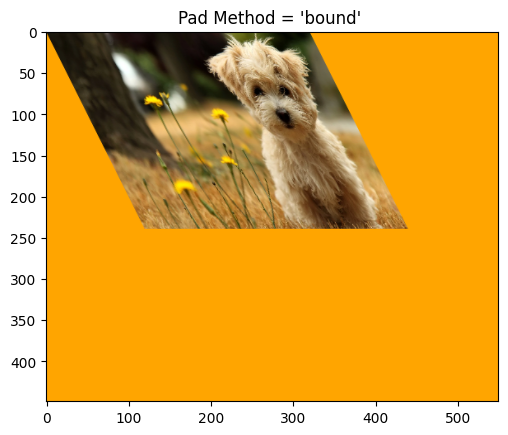

In [14]:
path='/content/drive/MyDrive/Uni/tmu/vision/hapoo.jpg'
A = cv2.imread(path)
A = cv2.resize(A, (320, 240))

a = 0.5
T = np.array([[1, a, 0], [0, 1, 0]], dtype=np.float32)
output_width = 549
output_height = 449

fill_value = (0, 165, 255)

Bb = cv2.warpAffine(A, T, (output_width, output_height), borderMode=cv2.BORDER_CONSTANT, borderValue=fill_value)

plt.imshow(cv2.cvtColor(Bb, cv2.COLOR_BGR2RGB))
plt.title("Pad Method = 'bound' ")
plt.show()


step 4

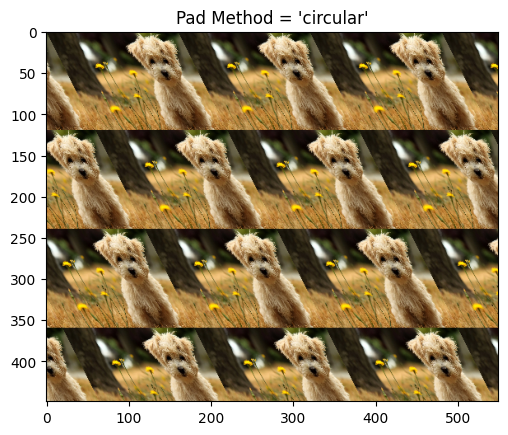

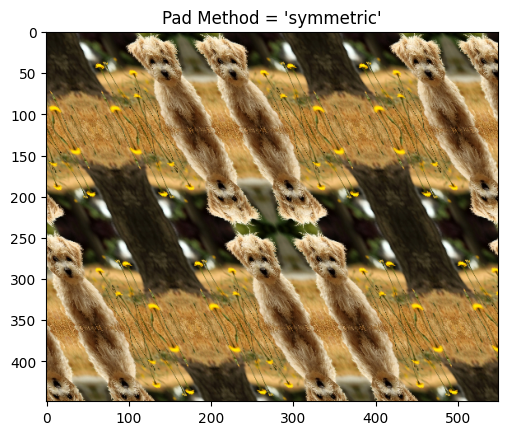

In [19]:
path='/content/drive/MyDrive/Uni/tmu/vision/hapoo.jpg'
A = cv2.imread(path)
A = cv2.resize(A, (320, 240))
a = 0.5
Thalf = np.array([[1, a, 0], [0, 1, 0]], dtype=np.float32) / 2.0
output_width = 549
output_height = 449
fill_value = (0, 165, 255)
circular_flag = cv2.BORDER_WRAP
symmetric_flag = cv2.BORDER_REFLECT
Bc = cv2.warpAffine(A, Thalf, (output_width, output_height), borderMode=circular_flag, borderValue=fill_value)
plt.imshow(cv2.cvtColor(Bc, cv2.COLOR_BGR2RGB))
plt.title("Pad Method = 'circular'")
plt.show()

Bs = cv2.warpAffine(A, Thalf, (output_width, output_height), borderMode=symmetric_flag, borderValue=fill_value)

plt.imshow(cv2.cvtColor(Bs, cv2.COLOR_BGR2RGB))
plt.title("Pad Method = 'symmetric'")
plt.show()
